In [43]:
import pandas as pd

from pandas.compat.pickle_compat import _class_locations_map

_class_locations_map.update({
    ('pandas.core.internals.managers', 'BlockManager'): ('pandas.core.internals', 'BlockManager')
})

df = pd.read_pickle('auto.pkl')

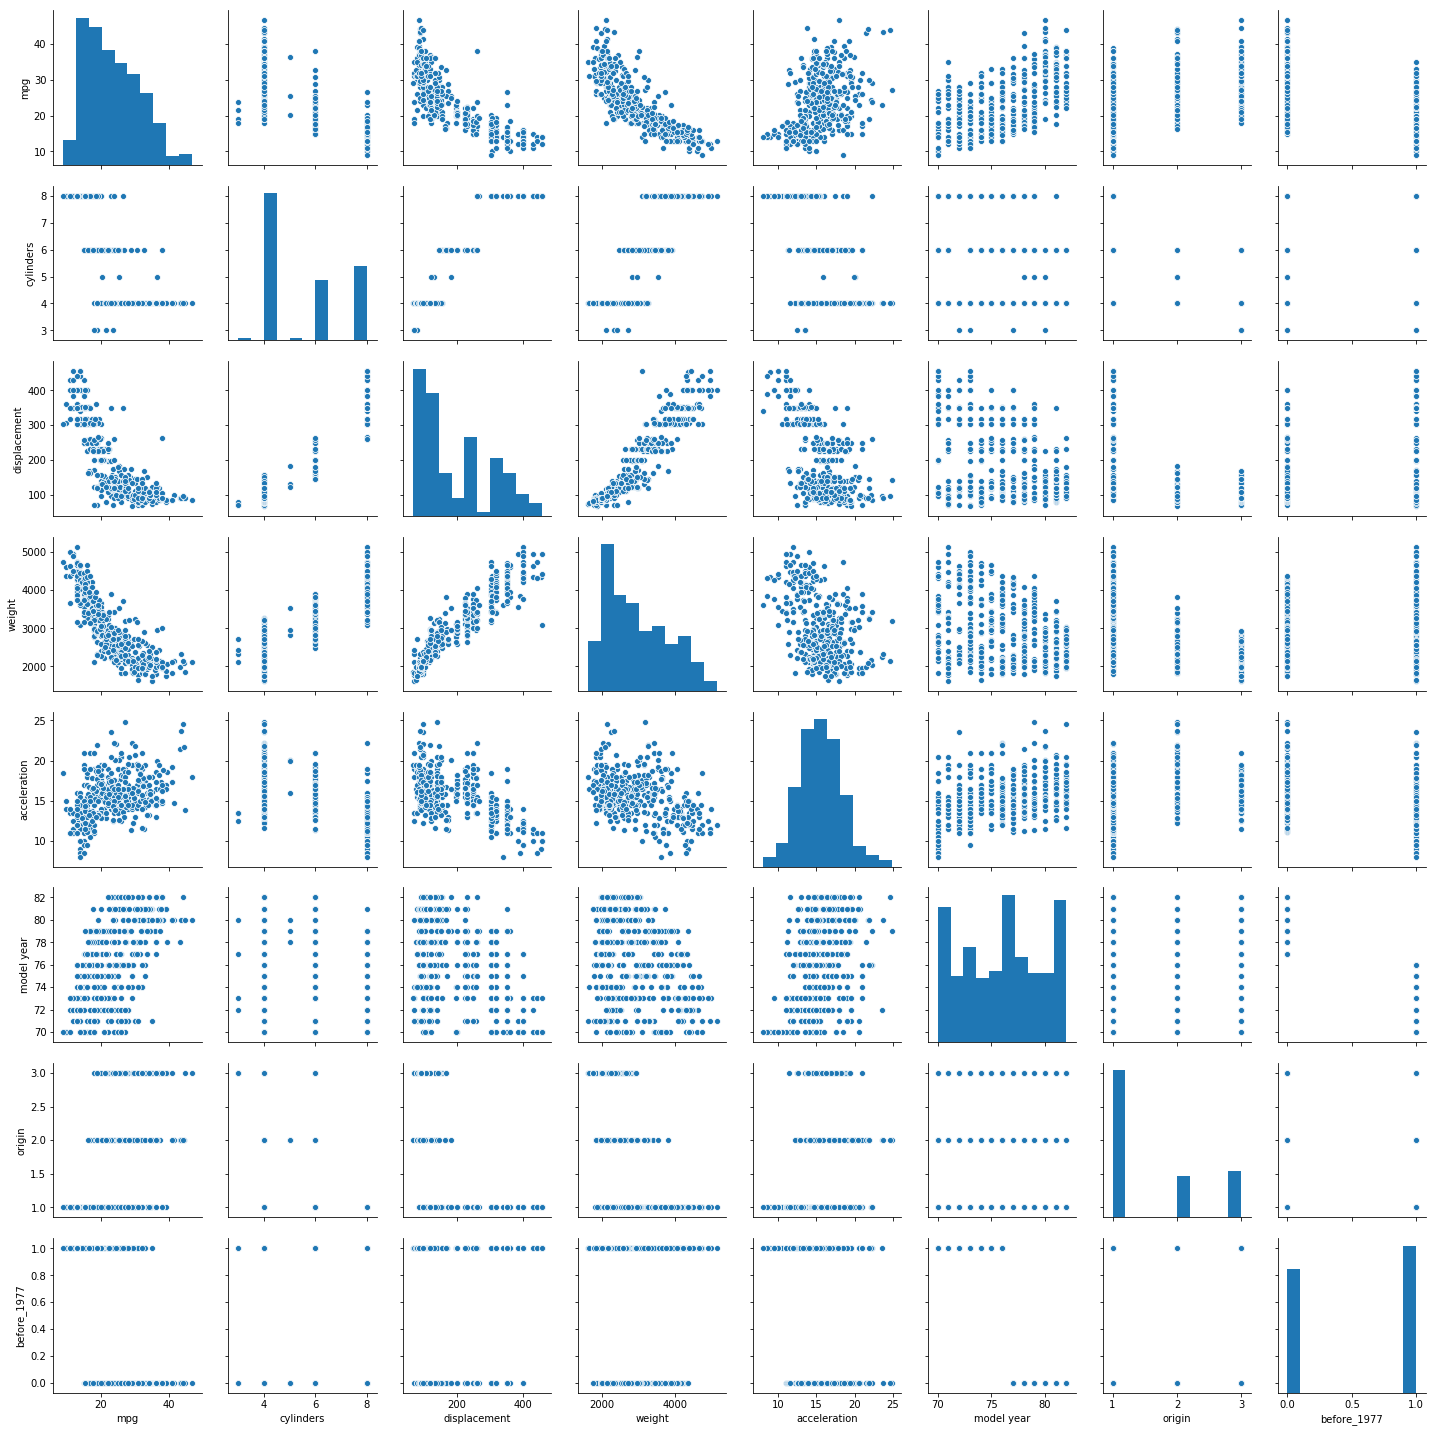

In [44]:
import seaborn as sns
sns.pairplot(df)

In [45]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,before_1977
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1


In [48]:
abs(df.corr())>0.9


,mpg,cylinders,displacement,weight,acceleration,model year,origin,before_1977
mpg,True,False,False,False,False,False,False,False
cylinders,False,True,True,False,False,False,False,False
displacement,False,True,True,True,False,False,False,False
weight,False,False,True,True,False,False,False,False
acceleration,False,False,False,False,True,False,False,False
model year,False,False,False,False,False,True,False,False
origin,False,False,False,False,False,False,True,False
before_1977,False,False,False,False,False,False,False,True


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [16]:
df.horsepower.drop()

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [38]:

df = df.drop(columns=['cylinders'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
displacement    398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
before_1977     398 non-null int64
dtypes: float64(2), int64(4)
memory usage: 18.7 KB


In [40]:
df.values

array([[3.070e+02, 3.504e+03, 1.200e+01, 7.000e+01, 1.000e+00, 1.000e+00],
       [3.500e+02, 3.693e+03, 1.150e+01, 7.000e+01, 1.000e+00, 1.000e+00],
       [3.180e+02, 3.436e+03, 1.100e+01, 7.000e+01, 1.000e+00, 1.000e+00],
       ...,
       [1.350e+02, 2.295e+03, 1.160e+01, 8.200e+01, 1.000e+00, 0.000e+00],
       [1.200e+02, 2.625e+03, 1.860e+01, 8.200e+01, 1.000e+00, 0.000e+00],
       [1.190e+02, 2.720e+03, 1.940e+01, 8.200e+01, 1.000e+00, 0.000e+00]])

In [41]:
variance_inflation_factor(df.values, 1)

114.20704982023322

In [42]:
# select only columns with datatype int64 or float 64
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF Score"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# label the scores with their related columns
vif["features"] = df.columns

vif

,VIF Score,features
0,48.184658,displacement
1,114.207050,weight
2,53.253957,acceleration
3,95.656740,model year
4,7.833265,origin
5,2.609179,before_1977
